<h3 style='text-align: center;'>CodeClause</h3>
<h1 align="center">Stock Market Prediction</h1> 
<div style="text-align: right">Created<br>
-- by Ruhit Debnath<br>
-- for CodeClause<br>
-- June, 2023</div>

In [12]:
!pip install chart_studio

Defaulting to user installation because normal site-packages is not writeable


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [14]:
tesla = pd.read_csv('TSLA.csv')
tesla.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400
2955,2022-03-24,1009.729980,1024.489990,988.799988,1013.919983,1013.919983,22901900


In [15]:
ferrari = pd.read_csv('Ferrari.csv')
ferrari.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1880,2023-04-13,283.000000,284.859985,279.720001,282.940002,282.940002,679800
1881,2023-04-14,284.940002,286.609985,284.350006,285.529999,285.529999,462000
1882,2023-04-17,280.619995,281.399994,277.920013,281.040009,281.040009,337500
1883,2023-04-18,280.140015,281.640015,278.925995,280.600006,280.600006,309300
1884,2023-04-19,279.959991,280.190002,278.220001,278.630005,278.630005,271900


In [16]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [17]:
ferrari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1885 non-null   object 
 1   Open       1885 non-null   float64
 2   High       1885 non-null   float64
 3   Low        1885 non-null   float64
 4   Close      1885 non-null   float64
 5   Adj Close  1885 non-null   float64
 6   Volume     1885 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 103.2+ KB


In [18]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}') 
print(f'Total days = {(tesla.Date.max()  - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 2022-03-24 00:00:00
Total days = 4286 days


In [19]:
ferrari['Date'] = pd.to_datetime(ferrari['Date'])

print(f'Dataframe contains stock prices between {ferrari.Date.min()} {ferrari.Date.max()}') 
print(f'Total days = {(ferrari.Date.max()  - ferrari.Date.min()).days} days')

Dataframe contains stock prices between 2015-10-22 00:00:00 2023-04-19 00:00:00
Total days = 2736 days


In [20]:
tesla.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [21]:
ferrari.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1.885000e+03
mean,146.694973,147.990397,145.406204,146.696976,144.380032,4.850036e+05
std,64.586379,65.092660,64.076793,64.569438,65.175258,4.721486e+05
min,32.290001,32.480000,31.660000,32.000000,30.226114,5.380000e+04
25%,105.720001,106.580002,104.260002,105.190002,101.958740,2.602000e+05
50%,151.500000,153.259995,150.000000,151.039993,148.161163,3.703000e+05
75%,200.860001,202.240005,199.264999,200.729996,199.868561,5.471000e+05
max,284.940002,286.609985,284.350006,285.529999,285.529999,7.485100e+06


<AxesSubplot:>

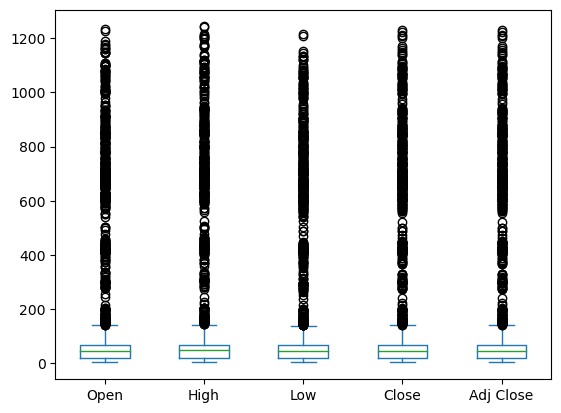

In [22]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

<AxesSubplot:>

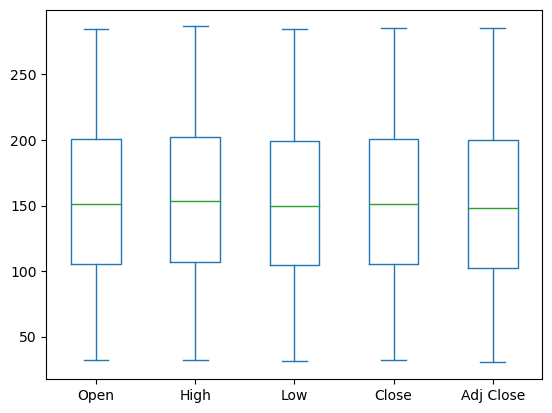

In [23]:
ferrari[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [24]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Times New Roman',
            size=20,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Times New Roman',
            size=20,
            color='#7f7f7f'
        )
    )
)

tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
plotTesla = go.Figure(data=tesla_data, layout=layout)

In [25]:
iplot(plotTesla)

In [26]:
# Setting the layout for our plot
layout2 = go.Layout(
    title='Stock Prices of Ferrari',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Times New Roman',
            size=20,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Times New Roman',
            size=20,
            color='#7f7f7f'
        )
    )
)

ferrari_data = [{'x':ferrari['Date'], 'y':ferrari['Close']}]
plotFerrari = go.Figure(data=ferrari_data, layout=layout2)

iplot(plotFerrari)

In [27]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [28]:
#Split the data into train and test sets
XT = np.array(tesla.index).reshape(-1,1)
YT = tesla['Close']
XT_train, XT_test, YT_train, YT_test = train_test_split(XT, YT, test_size=0.3, random_state=101)

In [29]:
#Split the data into train and test sets
XF = np.array(ferrari.index).reshape(-1,1)
YF = ferrari['Close']
XF_train, XF_test, YF_train, YF_test = train_test_split(XF, YF, test_size=0.3, random_state=101)

In [30]:
# Feature scaling
scalerT = StandardScaler().fit(XT_train)

In [31]:
# Feature scaling
scalerF = StandardScaler().fit(XF_train)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
#Creating a linear model
lmT = LinearRegression()
lmT.fit(XT_train, YT_train)

LinearRegression()

In [34]:
#Creating a linear model
lmF = LinearRegression()
lmF.fit(XF_train, YF_train)

LinearRegression()

In [35]:
#Plot actual and predicted values for train dataset
trace0T = go.Scatter(
    x = XT_train.T[0],
    y = YT_train,
    mode = 'markers',
    name = 'Actual'
)
trace1T = go.Scatter(
    x = XT_train.T[0],
    y = lmT.predict(XT_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0T,trace1T]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

In [36]:
iplot(plot2)

In [37]:
#Plot actual and predicted values for train dataset
trace0F = go.Scatter(
    x = XF_train.T[0],
    y = YF_train,
    mode = 'markers',
    name = 'Actual'
)
trace1F = go.Scatter(
    x = XF_train.T[0],
    y = lmF.predict(XF_train).T,
    mode = 'lines',
    name = 'Predicted'
)
ferrari_data = [trace0F,trace1F]
layout2.xaxis.title.text = 'Day'
plot3 = go.Figure(data=ferrari_data, layout=layout2)

iplot(plot3)

In [38]:
#Calculate scores for model evaluation
scoresT = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(YT_train, lmT.predict(XT_train))}\t{r2_score(YT_test, lmT.predict(XT_test))}
{'MSE'.ljust(10)}{mse(YT_train, lmT.predict(XT_train))}\t{mse(YT_test, lmT.predict(XT_test))}
'''
print(scoresT)


Metric           Train                Test        
r2_score  0.44921483057462286	0.4319788328864985
MSE       35834.067709721145	32083.18991181633



In [39]:
#Calculate scores for model evaluation
scoresF = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(YF_train, lmF.predict(XF_train))}\t{r2_score(YF_test, lmF.predict(XF_test))}
{'MSE'.ljust(10)}{mse(YF_train, lmF.predict(XF_train))}\t{mse(YF_test, lmF.predict(XF_test))}
'''
print(scoresF)


Metric           Train                Test        
r2_score  0.9124878903841737	0.9129393620327814
MSE       360.42384416672706	372.5951944485245

